# Data analyse Daan scheltema (s1156995) 22-2-2026

# Context

Voor deze data-analyse is een eigen scraper ontwikkeld die gericht is op het verzamelen van TikTok-video’s op basis van vooraf gedefinieerde zoekwoorden. De scraper zoekt binnen het TikTok-platform naar video’s waarvan de inhoud of metadata overeenkomt met specifieke keywords die gerelateerd zijn aan vuurwapenmodificaties en -conversies. Voor iedere gevonden video worden zowel video-, interactie- als profielgerelateerde kenmerken verzameld.

De volgende variabelen zijn per video opgenomen in de dataset: een unieke video-identificatie (`video_id`), de bijbehorende URL (`video_url`), engagementstatistieken zoals het aantal weergaven (`views`), likes (`likes`), reacties (`comments`), shares (`shares`) en saves (`saves`), evenals informatie over de maker van de video (`author`), het aantal volgers (`followers`), gevolgde accounts (`following`), het totaal aantal profiel-likes (`profile_likes`) en het totale aantal geplaatste video’s (`total_videos`). Daarnaast zijn tekstuele velden verzameld, waaronder de profielbeschrijving (`profile_bio`), de videobeschrijving (`video_desc`), gebruikte hashtags (`hashtags`) en eventuele externe links in de biografie (`bio_links`).

Op basis van verkennend onderzoek in open bronnen is vastgesteld dat de onderstaande zoekwoorden worden gebruikt in relatie tot vuurwapenconversies en -modificaties. Deze keywords zijn daarom geselecteerd en ingezet bij het scrapen van TikTok-content:
- Glock switch  
- G switch  
- Auto sear  
- AR-15 auto sear  
- 3D switch  
- 3D Glock switch  
- Full-auto sear  
- Auto switch  
- Chip  
- Switchy  
- Swift link  
- Lightning link  
- Yankee Boogle  
- Giggle switch  
- Ghost switch  
- Plastic switch  
- Metal switch  
- Draco switch
- Button

Door deze keyword-gebaseerde aanpak worden zowel informatieve, culturele als mogelijk commerciële uitingen binnen hetzelfde thematische domein meegenomen. Dit maakt het mogelijk om niet alleen afzonderlijke gevallen te analyseren, maar ook bredere patronen in communicatie, doorverwijzing en mogelijke wervingsstrategieën in kaart te brengen.

## Biases in de dataset

De dataset is samengesteld op basis van gescrapete online bronnen op het platform Tiktok zonder vpn uit het land Nederland. Hierdoor zijn relatief veel domeinen met een .nl extensie en Belgische (.be) links opgenomen. Deze geografische focus kan leiden tot een vertekening in de resultaten, aangezien het gebruik van platformen en de aard van commerciële communicatie kan verschillen per land of regio. Platformen die in Nederland populair zijn kunnen hierdoor oververtegenwoordigd zijn ten opzichte van platformen die internationaal of in andere regio’s dominanter zijn.

Daarnaast kan de dataset beïnvloed zijn door selectiebias, aangezien alleen publiek toegankelijke en vindbare online content op de Tiktok video page is meegenomen. Privécommunicatie of gesloten netwerken blijven buiten beschouwing, wat betekent dat de analyse geen volledig beeld geeft van alle mogelijke commerciële activiteiten.

# Doel van de analyse/ Hoofdvraag en deelvragen

Het doel van deze analyse is het ondersteunen bij het beantwoorden van de opgestelde hoofd- en deelvragen. Door middel van datagedreven analyse wordt inzicht verkregen in de wijze waarop online communicatie en doorverwijzing plaatsvinden binnen de context van vuurwapenconversies en -modificaties.

**Hoofdvraag / doelstelling**  
*Wat is het proces van het werven van klanten voor vuurwapenconversies en -modificaties in een online omgeving?*

**Deelvragen**  
- Naar welke platformen worden potentiële klanten doorverwezen?  
- Wat voor soort advertenties en wervingsstrategieën worden gebruikt om potentiële klanten te bereiken?

## Imports gebruikt voor de analyse

In [851]:
#Imports

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


### Inladen van de dataset

In [852]:
#Inladen csv bestand met daarin de gescrapte data vanaf Tiktok
path = r"C:\Users\daans\PycharmProjects\Tiktok\Merge\tiktok_results_lastscrapefinal.csv"

#Het bestand is een Windows-1252 (cp1252) én hij gebruikt ; als scheidingsteken. Dit moet ik aangeven zodat hij goed het bestand kan uitlezen.
df = pd.read_csv(
    path,
    sep=";",
    encoding="cp1252"
)

# Data weergave en cleaning

In [853]:
#inlezen van de data
# informatie over de dataset. Wat zijn de colommen en wat voor data types zitten in de dataset?
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4577 entries, 0 to 4576
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   keyword        4577 non-null   str    
 1   video_id       4577 non-null   str    
 2   video_url      4577 non-null   str    
 3   views          4575 non-null   float64
 4   likes          4576 non-null   float64
 5   comments       4576 non-null   float64
 6   shares         4257 non-null   float64
 7   saves          4576 non-null   float64
 8   author         4577 non-null   str    
 9   followers      4573 non-null   float64
 10  following      4573 non-null   float64
 11  profile_likes  4573 non-null   float64
 12  total_videos   4573 non-null   float64
 13  profile_bio    4573 non-null   str    
 14  video_desc     4190 non-null   str    
 15  hashtags       4020 non-null   str    
 16  bio_links      1873 non-null   str    
dtypes: float64(9), str(8)
memory usage: 608.0 KB


In [854]:
#Kijken of het bestand goed ingeladen is door de head (eerste 5 rijen) te checken.
df.head()

,keyword,video_id,video_url,views,likes,comments,shares,saves,author,followers,following,profile_likes,total_videos,profile_bio,video_desc,hashtags,bio_links
0,Chip,"7,59E+18",https://www.tiktok.com/@mitsybell/video/759164...,162900.0,6936.0,12.0,1910.0,211.0,mitsybell,274000.0,4710.0,181000000.0,53430.0,I'm bored so I post random things\nInsta: @mit...,I see the TRT is working on chip,"sabinablair,theburntchip,vlog,newyork,fyppppp",NaN
1,Chip,"7,58E+18",https://www.tiktok.com/@splatchips/video/75810...,10200.0,718.0,23.0,350.0,157.0,splatchips,169000.0,9470.0,3349000.0,2250.0,Instagram=splaterana\nSupporting page link????...,FMRIDB ??????,"kawaii,real,splatchip",https://ko-fi.com/splatchip
2,Chip,"7,61E+18",https://www.tiktok.com/@fiaformulae/video/7607...,812300.0,46100.0,109.0,9690.0,1693.0,fiaformulae,15000000.0,510.0,203000000.0,19980.0,the future of motorsport is electric ????\nNex...,CHIP WINS THE 2026 ????,"evosessions,formulae",https://linktr.ee/FIAFormulaE
3,Chip,"7,48E+18",https://www.tiktok.com/@nnewedts/video/7480251...,33000.0,2158.0,10.0,2040.0,660.0,nnewedts,134000.0,11810.0,58000000.0,3330.0,?? edits ?.\n?? ?? ?? ?? ??\n?. ? ? used to be...,@Chip coldest manager |,"fyp,chip,chippo,theburntchip,yungchip,sidemen,...",NaN
4,Chip,"7,54E+18",https://www.tiktok.com/@ukrapdaily01/video/753...,107600.0,8205.0,84.0,4830.0,431.0,ukrapdaily01,12580.0,1030.0,897000.0,1480.0,"UK Rap, Hip Hop, Drill & Grime Content????\nOv...",CHIP AT BIG SMOKE FESTIVAL @Big Smoke Festi...,"chip,ukgrime,ukrap",https://youtu.be/DEE4QaZ0vMI?si=VS5xR0gxvZkkFfUm


#### Floats -> Integers

De dataset ziet er over het algemeen goed uit en bevat in totaal 4.281 entries. Bij een aantal kolommen komen echter ontbrekende waarden (NaN) voor. Dit geldt met name voor: shares,hashtags,video_desc en bio_links (deze kolom bevat met 1.765 entries relatief veel ontbrekende waarden)

Daarnaast valt op dat numerieke kolommen zoals views, likes en comments momenteel zijn opgeslagen als floats. Aangezien deze waarden geen decimalen bevatten en er geen berekeningen met fracties worden verwacht, is het logischer en efficiënter om deze kolommen om te zetten naar integers.

Dit verbetert niet alleen de dataconsistentie, maar maakt verdere analyses ook duidelijker en minder foutgevoelig.

In [855]:
# Selecteer alle numerieke kolommen die nu floats zijn
float_cols = df.select_dtypes(include="float").columns

# Zet ze om naar integers (NaN blijft behouden)
df[float_cols] = df[float_cols].astype("Int64")

In [856]:
#Om te checken of alle Floats goed zijn omgezet naar Integers ga ik de eerste en laatste 5 lines van de dataset uitprinten.
#Ik kan hier dan gelijk kijken of ik andere opvallende dingen in de data kan spotten

In [857]:
df

,keyword,video_id,video_url,views,likes,comments,shares,saves,author,followers,following,profile_likes,total_videos,profile_bio,video_desc,hashtags,bio_links
0,Chip,"7,59E+18",https://www.tiktok.com/@mitsybell/video/759164...,162900,6936,12,1910,211,mitsybell,274000,4710,181000000,53430,I'm bored so I post random things\nInsta: @mit...,I see the TRT is working on chip,"sabinablair,theburntchip,vlog,newyork,fyppppp",NaN
1,Chip,"7,58E+18",https://www.tiktok.com/@splatchips/video/75810...,10200,718,23,350,157,splatchips,169000,9470,3349000,2250,Instagram=splaterana\nSupporting page link????...,FMRIDB ??????,"kawaii,real,splatchip",https://ko-fi.com/splatchip
2,Chip,"7,61E+18",https://www.tiktok.com/@fiaformulae/video/7607...,812300,46100,109,9690,1693,fiaformulae,15000000,510,203000000,19980,the future of motorsport is electric ????\nNex...,CHIP WINS THE 2026 ????,"evosessions,formulae",https://linktr.ee/FIAFormulaE
3,Chip,"7,48E+18",https://www.tiktok.com/@nnewedts/video/7480251...,33000,2158,10,2040,660,nnewedts,134000,11810,58000000,3330,?? edits ?.\n?? ?? ?? ?? ??\n?. ? ? used to be...,@Chip coldest manager |,"fyp,chip,chippo,theburntchip,yungchip,sidemen,...",NaN
4,Chip,"7,54E+18",https://www.tiktok.com/@ukrapdaily01/video/753...,107600,8205,84,4830,431,ukrapdaily01,12580,1030,897000,1480,"UK Rap, Hip Hop, Drill & Grime Content????\nOv...",CHIP AT BIG SMOKE FESTIVAL @Big Smoke Festi...,"chip,ukgrime,ukrap",https://youtu.be/DEE4QaZ0vMI?si=VS5xR0gxvZkkFfUm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4572,Button,"7,46099E+18",https://www.tiktok.com/@littlejackhorner1/vide...,6600000,237600,410,132000,9672,littlejackhorner1,1390,112,326100,76,?? EAT • DRINK • PLAY ??\nBooking & Reservatio...,Pop down to little jacks for ur espresso marti...,"pussyqueen,fyp,hospitality,espressomartini",NaN
4573,Button,"7,5563E+18",https://www.tiktok.com/@ebrii_11/video/7556300...,367100,22900,91,14330,6771,ebrii_11,110600,946,3800000,471,????????\nStreetwear y Lifestyle\n?? ebri@stud...,Camiseta con botones mangalarga!,"outfit,longsleeved,streetwear,outfitmen,camiseta",https://linktr.ee/ebrii_11
4574,Button,"7,52801E+18",https://www.tiktok.com/@luckidafat1/video/7528...,2200000,202200,651,264000,21884,luckidafat1,1571,18,370600,1,I am 6'7,Red Bottoms??,"redbottoms,louboutin,loubs",NaN
4575,Button,"7,59127E+18",https://www.tiktok.com/@prinsquid/video/759127...,1400000,284600,461,137000,47251,prinsquid,659,410,305700,76,????\nstudying artist who loves film\nsupport ...,2026 is for creating,"fyp,foryoupage,fashion,fashionhacks,sewing",NaN


Een ander ding wat opvalt is hoe de ID kolom nu wordt weer gegeven met deExcel scientific notation (bijv. `7,59164E+18`). Dit wijst erop dat mijn originele ID is beschadigd.
Dit zorgt ervoor dat dezelfde video altijd dezelfde ID heeft en maakt deduplicatie mogelijk

In [858]:
# Zet video_id om naar string en verwijder wetenschappelijke notatie
df["video_id"] = (
    df["video_id"]
    .astype(str)
    .str.replace(",", ".", regex=False)  # EU comma -> punt
    .astype(float)
    .astype("Int64")
    .astype(str)
)

In [859]:
print("dtype video_id:", df["video_id"].dtype)
print("Sample video_id values:")
print(df["video_id"].head(10).to_list())

print("\nUnique vs total (helps spot duplicates later):")
print("rows:", len(df), "unique video_id:", df["video_id"].nunique())

dtype video_id: str
Sample video_id values:
['7590000000000000000', '7580000000000000000', '7610000000000000000', '7480000000000000000', '7540000000000000000', '7590000000000000000', '7510000000000000000', '7600000000000000000', '7590000000000000000', '7410000000000000000']

Unique vs total (helps spot duplicates later):
rows: 4577 unique video_id: 376


Een TikTok-video kan in meerdere scrapes/keywords voorkomen. Als we direct duplicaten op `video_id` verwijderen, verliezen we de relatie tussen video en keyword(s), wat analyses per keyword kan vertekenen en niet ethisch is. Daarom houden we de originele dataset intact.

### Anonimisatie van auteursgegevens

In het kader van dit onderzoek zijn auteursgegevens uit de dataset verwijderd. 
Hoewel de data afkomstig is van een publiek toegankelijk platform, kan het opnemen 
van gebruikersnamen leiden tot het indirect herleiden van individuele personen.

Omdat de identiteit van individuele content creators niet relevant is voor de 
onderzoeksvraag, is ervoor gekozen om de kolom met auteursnamen te verwijderen 
uit de dataset. Hiermee wordt de privacy van betrokkenen gewaarborgd en wordt 
het onderzoek uitgevoerd volgens ethisch verantwoorde richtlijnen.

In [860]:
# Verwijder de kolom 'author' uit de dataset om auteurs te anonimiseren
df = df.drop(columns=["author"])

In [861]:
df.head(2)

,keyword,video_id,video_url,views,likes,comments,shares,saves,followers,following,profile_likes,total_videos,profile_bio,video_desc,hashtags,bio_links
0,Chip,7590000000000000000,https://www.tiktok.com/@mitsybell/video/759164...,162900,6936,12,1910,211,274000,4710,181000000,53430,I'm bored so I post random things\nInsta: @mit...,I see the TRT is working on chip,"sabinablair,theburntchip,vlog,newyork,fyppppp",NaN
1,Chip,7580000000000000000,https://www.tiktok.com/@splatchips/video/75810...,10200,718,23,350,157,169000,9470,3349000,2250,Instagram=splaterana\nSupporting page link????...,FMRIDB ??????,"kawaii,real,splatchip",https://ko-fi.com/splatchip


#### Tekstvelden normaliseren (whitespace & newlines)

Tekstkolommen zoals `profile_bio`, `video_desc` en `hashtags` bevatten nieuwe regels, extra spaties en inconsistente formatting. Dit bemoeilijkt zoekacties, string-matching en NLP-analyses. Door whitespace te normaliseren (newlines vervangen, meerdere spaties reduceren) maken we de tekst consistent en beter analyseerbaar, zonder inhoud te verliezen

In [862]:
# Tekstkolommen die we willen opschonen
text_cols = ["profile_bio", "video_desc", "hashtags", "bio_links"]

for c in text_cols:
    if c in df.columns:
        df[c] = (
            df[c]
            .astype("string")
            .str.replace(r"\r\n|\r|\n", " ", regex=True)  # newlines -> spatie
            .str.replace(r"\s+", " ", regex=True)         # meerdere spaties -> 1
            .str.strip()                                  # trim
        )

In [863]:
# Voor/na voorbeeld (eerste niet-NaN)
for c in text_cols:
    if c in df.columns:
        sample = df[c].dropna().head(3).to_list()
        print(f"\nColumn: {c}")
        for i, s in enumerate(sample, 1):
            print(f"{i}. {s[:120]}{'...' if len(s) > 120 else ''}")


Column: profile_bio
1. I'm bored so I post random things Insta: @mitsy_bell12
2. Instagram=splaterana Supporting page link???? I really want to do more cosplays for yall My main account ???? @silvanemi...
3. the future of motorsport is electric ???? Next race: Madrid on 21 March!????

Column: video_desc
1. I see the TRT is working on chip
2. FMRIDB ??????
3. CHIP WINS THE 2026 ????

Column: hashtags
1. sabinablair,theburntchip,vlog,newyork,fyppppp
2. kawaii,real,splatchip
3. evosessions,formulae

Column: bio_links
1. https://ko-fi.com/splatchip
2. https://linktr.ee/FIAFormulaE
3. https://youtu.be/DEE4QaZ0vMI?si=VS5xR0gxvZkkFfUm


#### Hashtags normaliseren

De kolom `hashtags` bevat hashtags als één string (meestal komma-gescheiden) en soms ontbrekende waarden. Voor analyses zoals “meest gebruikte hashtags”, co-occurrence of hashtag-frequenties is het beter om hashtags te normaliseren naar een lijst met tokens. We splitsen de string, strippen whitespace, lowercasen en verwijderen lege items. Daarna voegen we `hashtag_count` toe voor snelle feature-analyses.

In [864]:
# Maak hashtags als lijst (genormaliseerd)
if "hashtags" in df.columns:
    df["hashtags_list"] = (
        df["hashtags"]
        .astype("string")
        .fillna("")
        .str.lower()
        .str.split(",")  # jouw data lijkt comma-separated
        .apply(lambda xs: [x.strip().lstrip("#") for x in xs if x and x.strip()])
    )

    df["hashtag_count"] = df["hashtags_list"].apply(len)

In [865]:
print(df[["hashtags", "hashtags_list", "hashtag_count"]].head(5).to_string(index=False))

# Top 15 hashtags
from collections import Counter
top = Counter(h for lst in df["hashtags_list"] for h in lst).most_common(15)
top

                                                                                                                                                                                                   hashtags                                                                                                                                                                                                                   hashtags_list  hashtag_count
                                                                                                                                                              sabinablair,theburntchip,vlog,newyork,fyppppp                                                                                                                                                                             [sabinablair, theburntchip, vlog, newyork, fyppppp]              5
                                                                                                                  

[('fyp', 1408),
 ('viral', 422),
 ('switch', 301),
 ('foryou', 293),
 ('gaming', 241),
 ('nintendoswitch', 229),
 ('nintendo', 221),
 ('foryoupage', 212),
 ('fyp?', 187),
 ('funny', 155),
 ('switches', 123),
 ('switch2', 106),
 ('3dprinting', 104),
 ('trending', 95),
 ('buttons', 93)]

#### Index hernummeren (starten bij 1)

Na het opschonen, filteren en transformeren van de dataset kan de index versnipperd raken of beginnen bij 0. Hoewel de index technisch geen data is, kan dit verwarrend zijn bij inspectie, exports en rapportage. Daarom resetten we de index zodat deze aansluit bij de rijvolgorde en starten we bewust bij 1 in plaats van 0.

In [866]:
# Reset index en laat deze starten bij 1
df = df.reset_index(drop=True)
df.index = df.index + 1

In [867]:
print("Eerste index:", df.index[0])
print("Laatste index:", df.index[-1])
print("Aantal rijen:", len(df))

# Laat eerste 3 rijen zien met index
df.head(3)

Eerste index: 1
Laatste index: 4577
Aantal rijen: 4577


,keyword,video_id,video_url,views,likes,comments,shares,saves,followers,following,profile_likes,total_videos,profile_bio,video_desc,hashtags,bio_links,hashtags_list,hashtag_count
1,Chip,7590000000000000000,https://www.tiktok.com/@mitsybell/video/759164...,162900,6936,12,1910,211,274000,4710,181000000,53430,I'm bored so I post random things Insta: @mits...,I see the TRT is working on chip,"sabinablair,theburntchip,vlog,newyork,fyppppp",<NA>,"[sabinablair, theburntchip, vlog, newyork, fyp...",5
2,Chip,7580000000000000000,https://www.tiktok.com/@splatchips/video/75810...,10200,718,23,350,157,169000,9470,3349000,2250,Instagram=splaterana Supporting page link???? ...,FMRIDB ??????,"kawaii,real,splatchip",https://ko-fi.com/splatchip,"[kawaii, real, splatchip]",3
3,Chip,7610000000000000000,https://www.tiktok.com/@fiaformulae/video/7607...,812300,46100,109,9690,1693,15000000,510,203000000,19980,the future of motorsport is electric ???? Next...,CHIP WINS THE 2026 ????,"evosessions,formulae",https://linktr.ee/FIAFormulaE,"[evosessions, formulae]",2


### `keyword` normaliseren (whitespace/case)

De kolom `keyword` kan kleine variaties bevatten zoals extra spaties, nieuwe regels of verschillende hoofdletters (bijv. `Ghost switch` vs `ghost Switch `). Dit zorgt ervoor dat dezelfde keyword als meerdere categorieën wordt geteld in aggregaties. Daarom wordt daarom `keyword` genormaliseerd door whitespace te trimmen en consistente casing toe te passen.

In [868]:
df["keyword"] = (
    df["keyword"]
    .astype("string")
    .str.replace(r"\s+", " ", regex=True)  # meerdere whitespace -> 1 spatie
    .str.strip()
    .str.lower()                           # consistent: alles lowercase
)

In [869]:
print("Aantal unieke keywords:", df["keyword"].nunique())
print("\nTop 10 keywords:")
print(df["keyword"].value_counts().head(10))

# Showcase: kijk naar 'rare' keywords met dubbele spaties (zou nu 0 moeten zijn)
print("\nKeywords met dubbele spaties (moet leeg/0 zijn):")
print((df["keyword"].str.contains("  ", na=False)).sum())

Aantal unieke keywords: 19

Top 10 keywords:
keyword
plastic switch    297
metal switch      297
3d switch         296
button            296
swift link        293
chip              291
yankee boogle     267
giggle switch     265
auto sear         256
switchy           253
Name: count, dtype: Int64

Keywords met dubbele spaties (moet leeg/0 zijn):
0


### `bio_links` opschonen en domein extractie

De kolom `bio_links` is cruciaal en een kernpunt van mijn analyse echter bevat deze kolom zoals eerder gezien veel ontbrekende waarden, meerdere links of tracking-URL’s. Voor analyse is het nuttiger om het hoofddomein te kennen (bijv. `linktr.ee`, `instagram.com`, `youtube.com`) dan de volledige URL. We schonen de tekst op en extraheren het primaire domein, zodat links eenvoudig gegroepeerd en vergeleken kunnen worden.

In [870]:
# Opschonen: string maken en trimmen
df["bio_links_clean"] = (
    df["bio_links"]
    .astype("string")
    .str.strip()
)

# Domein extractie (eerste URL in de tekst)
df["bio_domain"] = (
    df["bio_links_clean"]
    .str.extract(r"https?://([^/\s]+)", expand=False)
    .str.lower()
)

In [871]:
print("Top 15 bio domains:")
print(df["bio_domain"].value_counts().head(15))

# Showcase: enkele rijen bekijken
df[["bio_links", "bio_domain"]].dropna().head(5)

Top 15 bio domains:
bio_domain
linktr.ee            459
discord.gg            96
youtube.com           91
www.instagram.com     71
beacons.ai            57
youtu.be              51
t.me                  33
ebay.us               20
linkin.bio            20
open.spotify.com      16
www.youtube.com       15
www.facebook.com      14
jouwautozoeker.nl     12
twitch.tv             11
linkfly.to            10
Name: count, dtype: Int64


,bio_links,bio_domain
2,https://ko-fi.com/splatchip,ko-fi.com
3,https://linktr.ee/FIAFormulaE,linktr.ee
5,https://youtu.be/DEE4QaZ0vMI?si=VS5xR0gxvZkkFfUm,youtu.be
6,https://linktr.ee/NIKULMusic,linktr.ee
7,https://linktr.ee/NIKULMusic,linktr.ee


### Numerieke sanity checks (negatief, nulwaarden, outliers)

Numerieke kolommen uit scrapes kunnen ongeldige waarden bevatten, zoals negatieve getallen of onverwachte nullen. Dit kan statistieken vertekenen en fouten veroorzaken in aggregaties. We voeren daarom sanity checks uit om negatieve waarden te detecteren, nulwaarden inzichtelijk te maken en globale outliers te inspecteren, zonder data automatisch te verwijderen.

In [872]:
# Relevante numerieke kolommen (alleen als ze bestaan)
num_cols = [
    "views", "likes", "comments", "shares", "saves",
    "followers", "following", "profile_likes", "total_videos"
]
num_cols = [c for c in num_cols if c in df.columns]

# 1) Check op negatieve waarden
negatives = (df[num_cols] < 0).sum()

# 2) Check op nulwaarden
zeros = (df[num_cols] == 0).sum()

# 3) Basis statistieken voor outlier-inspectie
stats = df[num_cols].describe().T[["min", "max", "mean"]]

In [873]:
print("Negatieve waarden per kolom:")
print(negatives)

print("\nNulwaarden per kolom:")
print(zeros)

print("\nBasis statistieken (outlier check):")
print(stats)

Negatieve waarden per kolom:
views            0
likes            0
comments         0
shares           0
saves            0
followers        0
following        0
profile_likes    3
total_videos     0
dtype: Int64

Nulwaarden per kolom:
views              0
likes             12
comments         273
shares             0
saves            192
followers         28
following        331
profile_likes      0
total_videos       0
dtype: Int64

Basis statistieken (outlier check):
                       min            max             mean
views                  2.0    185900000.0    905307.183169
likes                  0.0     27900000.0     80316.354677
comments               0.0       131600.0       583.558566
shares                 1.0    104000000.0     79117.651398
saves                  0.0      1800678.0      7141.168488
followers              0.0    485000000.0    844689.166849
following              0.0        88360.0       966.033895
profile_likes -672682582.0  16000000000.0  30637282.1

In [874]:
df.describe()

,views,likes,comments,shares,saves,followers,following,profile_likes,total_videos,hashtag_count
count,4575.0,4576.0,4576.0,4257.0,4576.0,4573.0,4573.0,4573.0,4573.0,4577.000000
mean,905307.183169,80316.354677,583.558566,79117.651398,7141.168488,844689.166849,966.033895,30637282.124426,1172.785699,5.547083
std,4520468.329983,553666.830917,3681.61753,1629241.21646,39133.559467,11288757.238028,3569.104706,339760467.197023,5036.730584,5.013271
min,2.0,0.0,0.0,1.0,0.0,0.0,0.0,-672682582.0,1.0,0.000000
25%,10300.0,223.75,8.0,110.0,29.0,1080.0,19.0,20400.0,54.0,3.000000
50%,71000.0,2018.0,40.0,1050.0,286.0,8563.0,114.0,319400.0,225.0,5.000000
75%,425700.0,19600.0,228.25,9440.0,2473.5,81000.0,590.0,3500000.0,712.0,7.000000
max,185900000.0,27900000.0,131600.0,104000000.0,1800678.0,485000000.0,88360.0,16000000000.0,161000.0,57.000000


#### Beschrijvende statistieken — kernobservaties

De engagement-variabelen (`views`, `likes`, `comments`, `shares`, `saves`) vertonen een sterk rechts-scheve verdeling: de gemiddelden liggen aanzienlijk hoger dan de medianen, wat wijst op een klassieke long-tail waarin een klein aantal virale video’s het totaal domineert. Dit maakt de mediaan en percentielen representatiever dan het gemiddelde. Daarnaast is de spreiding zeer groot (hoge standaarddeviaties), wat suggereert dat analyses zonder segmentatie misleidend kunnen zijn. Opvallend is dat een groot aantal volgers geen garantie is voor hoge video-performance. Verder bevat de kolom `profile_likes` onmogelijke negatieve waarden, wat duidt op parse- of scrape-fouten. Tot slot is het hashtaggebruik relatief consistent: de meeste video’s gebruiken circa 3–7 hashtags, met beperkte extreme uitschieters.

In [875]:
### Scatterplots

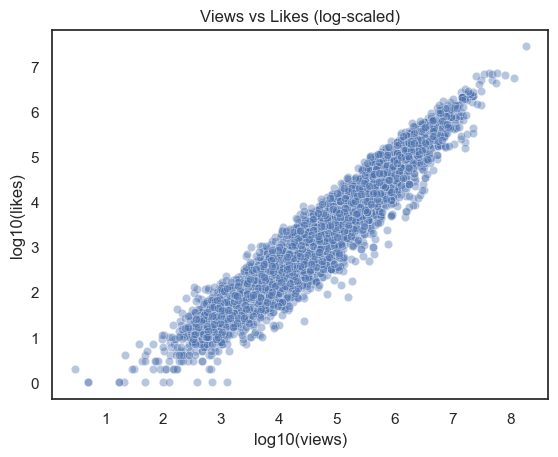

In [876]:
sns.scatterplot(
    data=df,
    x=np.log10(df["views"] + 1),
    y=np.log10(df["likes"] + 1),
    alpha=0.4
)

plt.xlabel("log10(views)")
plt.ylabel("log10(likes)")
plt.title("Views vs Likes (log-scaled)")
plt.show()

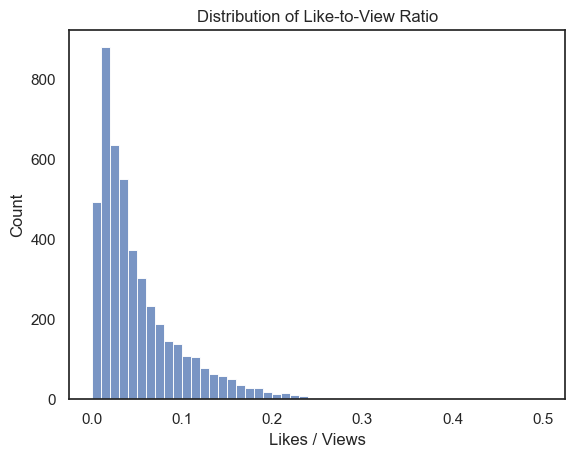

In [877]:
df["like_view_ratio"] = df["likes"] / df["views"]

sns.histplot(
    df["like_view_ratio"].dropna(),
    bins=50
)

plt.xlabel("Likes / Views")
plt.title("Distribution of Like-to-View Ratio")
plt.show()

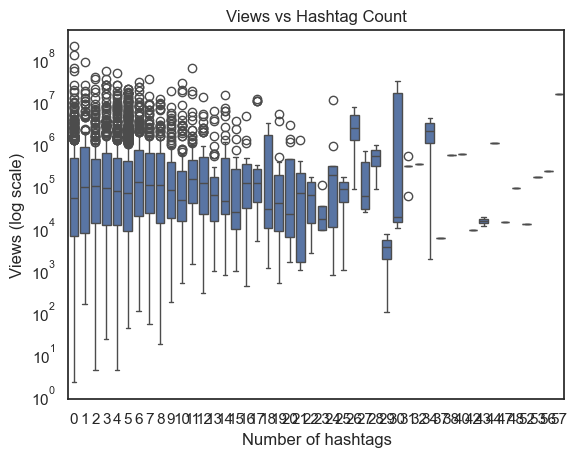

In [878]:
sns.boxplot(
    data=df,
    x="hashtag_count",
    y="views"
)

plt.yscale("log")
plt.xlabel("Number of hashtags")
plt.ylabel("Views (log scale)")
plt.title("Views vs Hashtag Count")
plt.show()

#### Exploratory visualisations

Ter afsluiting van de data preparation zijn meerdere visualisaties opgesteld om de relaties tussen bereik, engagement en contentkenmerken te verkennen. Vanwege de sterke scheefheid in de data zijn log-transformaties en ratio’s gebruikt, wat een beter inzicht geeft in onderliggende patronen dan ruwe metrische vergelijkingen.

# Data Analyse

## Deelvraag 1: "Naar welke platformen worden potentiële klanten doorverwezen?"

### Analyseaanpak Deelvraag 1 — Platformverwijzingen

Voor het beantwoorden van de deelvraag *“Naar welke platformen worden potentiële klanten doorverwezen?”* is gekozen voor een **descriptieve platform-analyse met functionele categorisering**. In plaats van individuele accounts of video’s als verkopers te labelen, richt deze aanpak zich op het identificeren van **structurele patronen in doorverwijzingen** vanuit TikTok naar externe platformen.

Deze analysetechniek is gekozen omdat niet kan worden aangenomen dat elke video met gerelateerde keywords daadwerkelijk commerciële intentie heeft.
Videos kunnen educatieve, entertaining of andere doeleinde bevatten.

Door platformen te analyseren op basis van hun **functionele eigenschappen** (bijvoorbeeld directe messaging, link-aggregatie of publieke contenthosting) kan inzicht worden verkregen in hoe potentiële klanten mogelijk worden geleid richting kanalen die geschikt zijn voor verdere interactie, zonder causale claims te maken.

De gekozen methode is geïnspireerd door een educatieve YouTube-video. (https://www.youtube.com/watch?v=Xx75loJvFhg)

Concreet wordt per video gekeken naar externe links in bio’s, waarna deze links worden geclassificeerd naar platformtype (bijv. messaging-diensten, social media, link-aggregators). Vervolgens wordt geanalyseerd welke platformtypen het meest voorkomen binnen verschillende keywords en engagementniveaus.

### Platformcategorieën — functionele typologie

Om externe doorverwijzingen systematisch te analyseren, zijn platformen geclassificeerd op basis van hun **functionele rol binnen het communicatieproces**, niet op basis van veronderstelde intentie. Deze typologie maakt het mogelijk om patronen te identificeren zonder individuele accounts als verkopers te labelen.

**Gedefinieerde categorieën:**

- **Directe messaging-platformen**  
  Voorbeelden: Telegram (`t.me`), WhatsApp, Signal  
  *Kenmerk:* lage frictie, privécommunicatie, geschikt voor één-op-één interactie.

- **Link-aggregators**  
  Voorbeelden: `linktr.ee`, `beacons.ai`, `solo.to`  
  *Kenmerk:* fungeren als doorgeefluik naar meerdere externe kanalen; intentie is contextafhankelijk.

- **Publieke social media**  
  Voorbeelden: Instagram, YouTube, Twitter/X  
  *Kenmerk:* publiek bereik, branding en contentdistributie, beperkte directe interactie.

- **Monetair georiënteerde platformen**  
  Voorbeelden: Ko-fi, PayPal, Cash App  
  *Kenmerk:* gericht op financiële transacties of donaties; potentiële commerciële relevantie.

- **Overig / onbekend**  
  Voorbeelden: persoonlijke websites, niet-herkende domeinen  
  *Kenmerk:* onvoldoende context om functioneel te classificeren.

Deze indeling maakt het mogelijk om te analyseren **welke typen platformen structureel vaker voorkomen** binnen specifieke keywords of engagementniveaus, zonder aannames te doen over daadwerkelijke verkoopactiviteiten.

In [879]:
# Definieer platformcategorieën op domein
platform_map = {
    # Directe messaging
    "t.me": "Directe messaging",
    "telegram.me": "Directe messaging",
    "wa.me": "Directe messaging",
    "signal.me": "Directe messaging",

    # Link-aggregators
    "linktr.ee": "Link-aggregator",
    "beacons.ai": "Link-aggregator",
    "solo.to": "Link-aggregator",

    # Publieke social media
    "instagram.com": "Publieke social media",
    "youtube.com": "Publieke social media",
    "youtu.be": "Publieke social media",
    "twitter.com": "Publieke social media",
    "x.com": "Publieke social media",
    "tiktok.com": "Publieke social media",

    # Monetair georiënteerd
    "ko-fi.com": "Monetair georiënteerd",
    "paypal.me": "Monetair georiënteerd",
    "cash.app": "Monetair georiënteerd",
}

# Functie om domein -> categorie te mappen
def map_platform(domain):
    if domain is None or pd.isna(domain):
        return "Geen link"
    for key, cat in platform_map.items():
        if key in domain:
            return cat
    return "Overig / onbekend"

# Toepassen
df["platform_category"] = df["bio_domain"].apply(map_platform)

In [880]:
# Verdeling van platformcategorieën
df["platform_category"].value_counts()

# Voorbeeldregels om mapping te verifiëren
df[["bio_domain", "platform_category"]].dropna().head(10)

,bio_domain,platform_category
2,ko-fi.com,Monetair georiënteerd
3,linktr.ee,Link-aggregator
5,youtu.be,Publieke social media
6,linktr.ee,Link-aggregator
7,linktr.ee,Link-aggregator
8,www.instagram.com,Publieke social media
10,linktr.ee,Link-aggregator
14,linktr.ee,Link-aggregator
15,youtu.be,Publieke social media
16,app.adjust.com,Overig / onbekend


Hoewel directe messaging-platformen zoals Telegram en Discord minder frequent voorkomen dan link-aggregators, zijn zij structureel aanwezig binnen de dataset. Deze platformen vervullen een andere functionele rol binnen het wervingsproces: zij faciliteren directe en vaak private interactie, terwijl link-aggregators dienen als publieke tussenlaag. De lagere frequentie van Telegram-links suggereert geen afwezigheid, maar een selectiever gebruik binnen het funnelproces.

### Gecombineerde platform-detectie — focus op directe messaging

Omdat uit het verkennend onderzoek is gebleken dat direct messaging platforms zoals Telegram en WhatsApp functioneel geschikter zijn voor één-op-één communicatie en transacties dan publieke social media zoals link-aggregratos / youtube, worden zij gebruikt als **indicatoren van verhoogde commerciële waarschijnlijkheid**. Hierbij wordt expliciet geen onderscheid gemaakt op individueel niveau tussen verkoop, educatie of entertainment.

Om een vollediger beeld te krijgen van het doorverwijzingsproces, worden Telegram- en WhatsApp-verwijzingen niet alleen gedetecteerd in expliciete bio-links, maar ook in tekstuele velden zoals `profile_bio` en `video_desc`. Deze gecombineerde detectie maakt het mogelijk om profielen en video’s te identificeren die **structureel gebruikmaken van directe communicatiekanalen**, wat duidt op een hogere mate van commerciële oriëntatie binnen het ecosysteem.

In [881]:
# Patronen voor private/direct messaging-platformen
patterns = {
    "telegram": r"(?:t\.me/|telegram\.me|telegram\b)",
    "whatsapp": r"(?:wa\.me/|whatsapp\.com|whatsapp\b)",
    "discord": r"(?:discord\.gg/|discord\.com|discord\b)",
    "snapchat": r"(?:snapchat\.com|snapchat\b|snap\s*:\s*@)",
    "signal": r"(?:signal\.me|signal\b)",
    "wickr": r"(?:wickr\.me|wickr\b)",
    "session": r"(?:getsession\.org|session\b)",
    "threema": r"(?:threema\.ch|threema\b)",
}

# Detectie in bio_domain (expliciete links)
for name, pattern in patterns.items():
    df[f"{name}_link_bio"] = df["bio_domain"].str.contains(pattern, case=False, na=False)

# Detectie in tekstvelden (impliciete verwijzingen)
for name, pattern in patterns.items():
    df[f"{name}_text_signal"] = (
        df["profile_bio"].str.contains(pattern, case=False, na=False) |
        df["video_desc"].str.contains(pattern, case=False, na=False)
    )

# Gecombineerd signaal per platform
for name in patterns.keys():
    df[f"{name}_signal"] = df[f"{name}_link_bio"] | df[f"{name}_text_signal"]

# Overkoepelend: private/direct messaging aanwezig
signal_cols = [f"{name}_signal" for name in patterns.keys()]
df["direct_messaging_signal"] = df[signal_cols].any(axis=1)

In [882]:
# Aantallen per platform
summary = {
    name: int(df[f"{name}_signal"].sum())
    for name in patterns.keys()
}
summary

{'telegram': 89,
 'whatsapp': 56,
 'discord': 182,
 'snapchat': 9,
 'signal': 2,
 'wickr': 0,
 'session': 5,
 'threema': 0}

In [883]:
# Percentage van dataset met minimaal één direct messaging-signaal
(df["direct_messaging_signal"].mean() * 100).round(2)

np.float64(6.03)

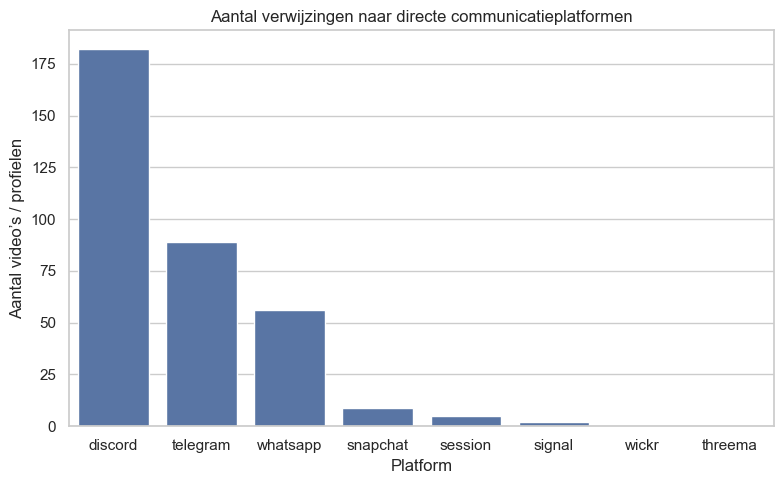

In [884]:

# summary is al aangemaakt
# summary = { "telegram": 89, ... }

plot_df = (
    pd.DataFrame.from_dict(summary, orient="index", columns=["Aantal"])
    .reset_index()
    .rename(columns={"index": "Platform"})
    .sort_values("Aantal", ascending=False)
)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))

sns.barplot(
    data=plot_df,
    x="Platform",
    y="Aantal"
)

plt.title("Aantal verwijzingen naar directe communicatieplatformen")
plt.xlabel("Platform")
plt.ylabel("Aantal video’s / profielen")

plt.tight_layout()
plt.show()

Zoals blijkt uit de samenvattende statistieken, bevat de dataset een substantieel aantal gevallen ((6.03%) waarin potentiële klanten worden doorverwezen naar private communicatiekanalen. Het gebruik van dergelijke kanalen hoeft echter niet per definitie te wijzen op commerciële activiteiten; met name bij platformen zoals Discord kunnen deze verwijzingen ook betrekking hebben op onschuldige of publieke community-interacties.

Om de kans te vergroten dat het gaat om doorverwijzingen die functioneel relevant zijn voor de mogelijke verkoop van vuurwapenconversies en -modificaties, wordt daarom gekozen voor een meer genuanceerde analysemethode. In plaats van individuele accounts of video’s als verkopers te classificeren, wordt commerciële waarschijnlijkheid benaderd aan de hand van een samengestelde likelihood score gebaseerd op meerdere onafhankelijke signalen.

Deze signalen omvatten onder andere het gebruik van directe messaging-platformen, de aanwezigheid van commercieel getinte taal in profiel- en videoteksten, en specifieke combinaties van doorverwijzingen. Door deze signalen te combineren ontstaat een graduele maat voor commerciële oriëntatie, in plaats van een binaire classificatie, wat zowel analytisch robuuster als ethisch verantwoorder is.

###  Detectie van commercieel getinte taal

Om onderscheid te maken tussen educatieve, entertainment- en mogelijk commerciële content, wordt commercieel getinte taal gedetecteerd in `profile_bio` en `video_desc`. Deze stap richt zich op transactietaal, call-to-action signalen en exclusiviteitswoorden die functioneel passen bij wervings- of verkoopprocessen. De aanwezigheid van dergelijke taal wordt gebruikt als onafhankelijk signaal binnen de samengestelde likelihood score.

In deze analyse wordt commerciële taal gebruikt als indicator voor commerciële intentie. De aanwezigheid van termen die verwijzen naar verkoop, prijzen, transacties of promoties suggereert dat communicatie gericht is op het aanbieden van goederen of diensten. Hoewel commerciële intentie niet direct observeerbaar is, vormt het gebruik van dergelijke taal een gangbare en reproduceerbare proxy om commerciële activiteiten binnen tekstuele data te identificeren. 

Hierbij moet opgemerkt worden dat het gebruik van commerciële taal niet in alle gevallen leidt tot daadwerkelijke transacties, maar wel inzicht biedt in de mate waarin platformen worden ingezet voor commerciële doeleinden.

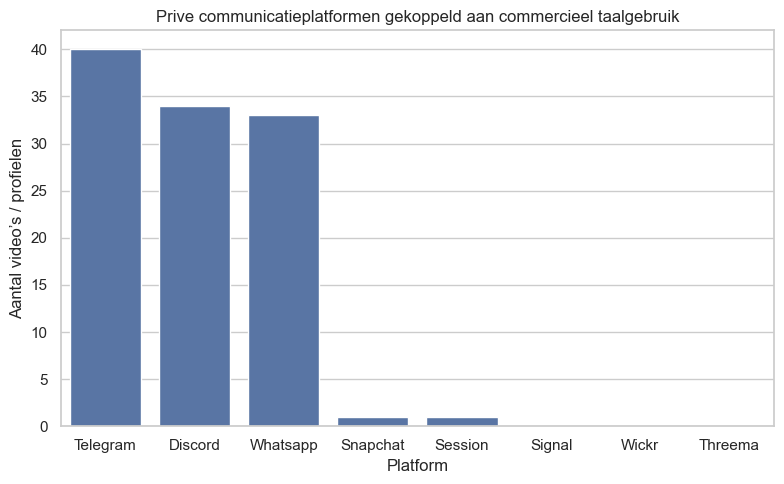

In [885]:
platforms = [
    "telegram",
    "whatsapp",
    "discord",
    "snapchat",
    "signal",
    "session",
    "wickr",
    "threema"
]

# Commercieel georiënteerde termen
transaction_terms = ["sell","selling","buy","order","price","pricing","available","stock","batch","drops","shipping","ship"]
cta_terms = ["dm me","pm me","contact","hit me up","message me","link in bio","tap link"]
exclusivity_terms = ["private","only","exclusive","limited","no comments","backup","alt","secondary"]

def make_pattern(terms):
    return r"(?:\b" + r"\b|\b".join(re.escape(t) for t in terms) + r"\b)"

transaction_pattern = make_pattern(transaction_terms)
cta_pattern = make_pattern(cta_terms)
exclusivity_pattern = make_pattern(exclusivity_terms)

# Signaal voor commercieel getinte taal (enkele bron)
df["commercieel_taal_signaal"] = (
    df["profile_bio"].str.contains(transaction_pattern, case=False, na=False) |
    df["video_desc"].str.contains(transaction_pattern, case=False, na=False) |
    df["profile_bio"].str.contains(cta_pattern, case=False, na=False) |
    df["video_desc"].str.contains(cta_pattern, case=False, na=False) |
    df["profile_bio"].str.contains(exclusivity_pattern, case=False, na=False) |
    df["video_desc"].str.contains(exclusivity_pattern, case=False, na=False)
)

# Platform × commercieel taalgebruik
plot_df = pd.DataFrame(
    [
        {
            "Platform": p.capitalize(),
            "Aantal": int((df[f"{p}_signal"] & df["commercieel_taal_signaal"]).sum())
        }
        for p in platforms
    ]
).sort_values("Aantal", ascending=False)

# Visualisatie
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=plot_df, x="Platform", y="Aantal")

plt.title("Prive communicatieplatformen gekoppeld aan commercieel taalgebruik")
plt.xlabel("Platform")
plt.ylabel("Aantal video’s / profielen")

plt.tight_layout()
plt.show()

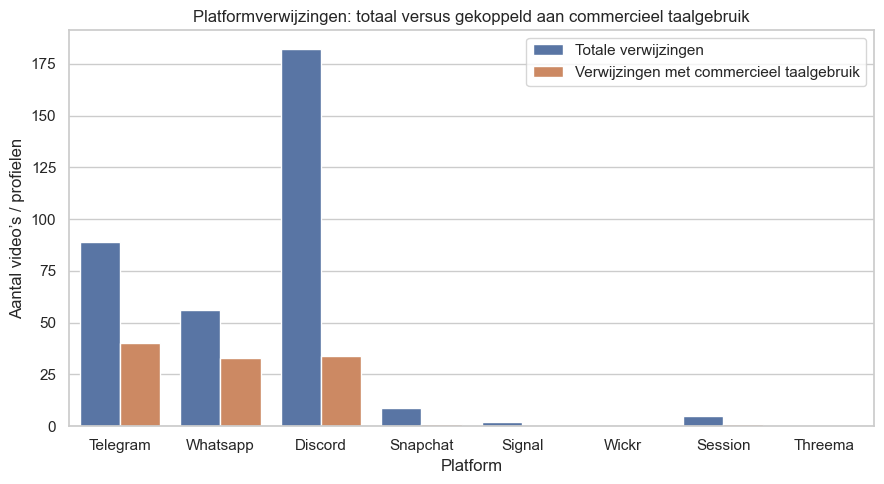

In [886]:
# --- 1) Totale platformverwijzingen (gebaseerd uit eerder gerunde plot)
total_counts = {
    "telegram": 89,
    "whatsapp": 56,
    "discord": 182,
    "snapchat": 9,
    "signal": 2,
    "wickr": 0,
    "session": 5,
    "threema": 0 
    }

# --- 2) Platform × commercieel taalgebruik
platforms = list(total_counts.keys())

overlap_counts = {
    p: int((df[f"{p}_signal"] & df["commercieel_taal_signaal"]).sum())
    for p in platforms
}

# --- 3) Vergelijkingsdataframe
comparison_df = pd.DataFrame({
    "Platform": [p.capitalize() for p in platforms],
    "Totale verwijzingen": [total_counts[p] for p in platforms],
    "Verwijzingen met commercieel taalgebruik": [overlap_counts[p] for p in platforms]
})

# Long format voor gegroepeerde balken
plot_long = comparison_df.melt(
    id_vars="Platform",
    value_vars=["Totale verwijzingen", "Verwijzingen met commercieel taalgebruik"],
    var_name="Type",
    value_name="Aantal"
)

# --- 4) Visualisatie
sns.set_theme(style="whitegrid")
plt.figure(figsize=(9, 5))
sns.barplot(data=plot_long, x="Platform", y="Aantal", hue="Type")

plt.title("Platformverwijzingen: totaal versus gekoppeld aan commercieel taalgebruik")
plt.xlabel("Platform")
plt.ylabel("Aantal video’s / profielen")
plt.legend(title="")

plt.tight_layout()
plt.show()

### Normalisatie van commerciële koppeling per platform

Absolute aantallen geven inzicht in de omvang van platformgebruik, maar kunnen misleidend zijn wanneer platformen sterk verschillen in frequentie. Daarom is een genormaliseerde maat berekend die het aandeel platformverwijzingen weergeeft dat gepaard gaat met commercieel georiënteerde taal. Deze verhouding maakt het mogelijk om platformen onderling te vergelijken op basis van commerciële dichtheid in plaats van volume.

In [887]:
# total_counts heb je al
# overlap_counts zijn net berekend in de vorige stap

ratio_df = pd.DataFrame({
    "Platform": [p.capitalize() for p in total_counts.keys()],
    "Total": [total_counts[p] for p in total_counts.keys()],
    "Commercial": [overlap_counts[p] for p in total_counts.keys()]
})

# Ratio (veilig delen, geen /0)
ratio_df["Commercial_ratio"] = (
    ratio_df["Commercial"] /
    ratio_df["Total"].replace(0, pd.NA)
)

ratio_df

,Platform,Total,Commercial,Commercial_ratio
0,Telegram,89,40,0.449438
1,Whatsapp,56,33,0.589286
2,Discord,182,34,0.186813
3,Snapchat,9,1,0.111111
4,Signal,2,0,0.0
5,Wickr,0,0,<NA>
6,Session,5,1,0.2
7,Threema,0,0,<NA>


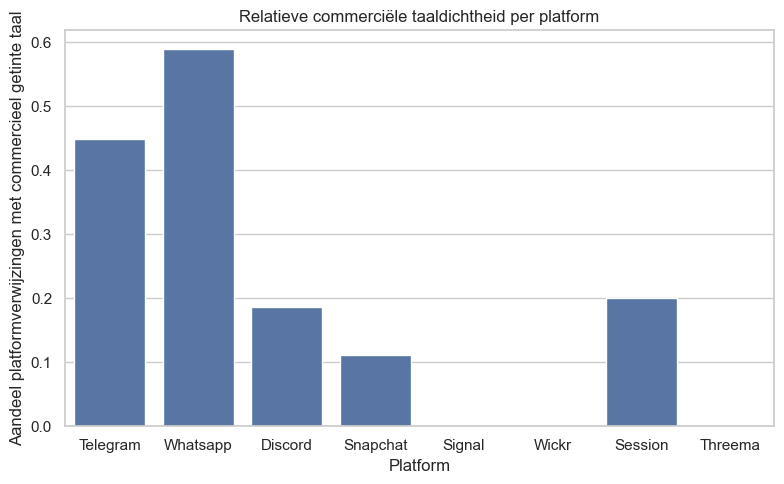

In [888]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))

sns.barplot(
    data=ratio_df,
    x="Platform",
    y="Commercial_ratio"
)

plt.title("Relatieve commerciële taaldichtheid per platform")
plt.xlabel("Platform")
plt.ylabel("Aandeel platformverwijzingen met commercieel getinte taal")

plt.tight_layout()
plt.show()

## Conclusie van analyse deelvraag: "Naar welke platformen worden potentiële klanten doorverwezen?"

Op basis van de analyse blijkt dat potentiële klanten vanuit TikTok naar verschillende externe communicatieplatformen worden doorverwezen, waarbij duidelijke verschillen zichtbaar zijn in zowel gebruiksfrequentie als commerciële relevantie. Discord komt in absolute zin het meest voor als doorverwijzingsplatform in de dataset. De genormaliseerde analyse toont echter aan dat slechts een beperkt aandeel van deze Discord-verwijzingen gepaard gaat met commercieel getinte taal. Dit duidt erop dat Discord in veel gevallen fungeert als een algemeen community- of communicatieplatform en niet primair als kanaal voor directe verkoop.

Telegram en WhatsApp komen minder frequent voor in de dataset als geheel, maar vertonen een substantieel hogere relatieve commerciële taaldichtheid. Met name WhatsApp laat zien dat een groot deel van de verwijzingen samenvalt met commercieel georiënteerde taal. Dit wijst erop dat deze platformen selectiever worden ingezet en vooral worden gebruikt in contexten waarin directe interactie en potentiële transacties centraal staan. Daarmee lijken Telegram en WhatsApp een prominentere rol te spelen in de latere fasen van het wervingsproces.

Andere platformen zoals Snapchat, Signal en Session komen slechts sporadisch voor. Hoewel het absolute aantal verwijzingen laag is, laat de relatieve taaldichtheid zien dat deze platformen in specifieke gevallen wel degelijk worden ingezet voor directe communicatie. Dit suggereert nichegebruik binnen kleinere of meer afgebakende netwerken. In samenhang laten de resultaten zien dat niet de frequentie van platformgebruik op zichzelf bepalend is, maar de combinatie van platformgebruik en commercieel georiënteerde taal een sterkere indicatie vormt voor commerciële doorverwijzing.

## Deelvraag 2 : "Wat voor soort advertenties worden gebruikt om potentiële klanten te werven? "

Voor de tweede deelvraag wordt een andere analysemethode gehanteerd dan bij de analyse van doorverwijzingsplatformen. In plaats van te focussen op externe links en communicatiekanalen, richt deze analyse zich op de inhoudelijke en stilistische kenmerken van de gebruikte wervingsstrategieën. Hierbij wordt gekeken naar de manier waarop content wordt gepresenteerd, welke vormen van advertentietaal worden ingezet en hoe expliciet potentiële klanten worden aangesproken.

### Analysetechniek: rule-based thematische contentanalyse

Voor de analyse van de tweede deelvraag is gekozen voor een *rule-based thematische contentanalyse*. Deze analysetechniek richt zich op het systematisch identificeren en categoriseren van inhoudelijke patronen in tekstdata op basis van vooraf gedefinieerde regels en thema’s. In plaats van automatisch gegenereerde categorieën, zoals bij unsupervised clusteringmethoden, maakt deze aanpak gebruik van expliciete criteria die zijn gebaseerd op inhoudelijke en functionele kenmerken van de data.

De keuze voor deze techniek is bewust gemaakt na openbronnen onderzoek en het lezen van dit scribbr artikel https://www.scribbr.nl/onderzoeksmethoden/inhoudsanalyse/. De onderzoeksvraag is verklarend van aard en richt zich op het identificeren van typen advertenties en wervingsstrategieën, niet op het exploratief ontdekken van onbekende patronen. Clusteringtechnieken, zoals k-means, groeperen observaties op basis van statistische overeenkomst, maar bieden beperkte interpretatiemogelijkheden bij semantisch ambigue en contextafhankelijke termen. Dit kan leiden tot moeilijk uitlegbare of methodologisch zwakke clusters.

Een rule-based thematische contentanalyse biedt daarentegen een hoge mate van transparantie en controle. Door advertentietypen vooraf te definiëren en te operationaliseren via woordenlijsten en detectieregels, blijft inzichtelijk waarom bepaalde content onder een specifieke categorie valt. Deze aanpak is reproduceerbaar, interpreteerbaar en ethisch verantwoord, wat met name van belang is gezien de gevoeligheid van het onderzoeksdomein. Daarnaast sluit deze methode goed aan bij de aard van de beschikbare data, die bestaat uit korte profiel- en videoteksten waarin expliciete en impliciete vormen van wervingscommunicatie voorkomen.

### Advertentiedichtheid per keyword

Om inzicht te krijgen in het type advertenties dat wordt gebruikt, wordt per zoekwoord (keyword) gekeken welk aandeel van de bijbehorende video’s kenmerken vertoont van commercieel of wervend taalgebruik. Deze maat wordt aangeduid als advertentiedichtheid: het aandeel video’s per keyword waarin commerciële signalen voorkomen. Hiermee kan worden vastgesteld welke keywords relatief vaker worden ingezet in een commerciële context en welke voornamelijk informatief of educatief van aard zijn.

### Advertentietypen en communicatiestijlen

Om onderscheid te maken tussen verschillende vormen van communicatie is content onderverdeeld in drie functionele categorieën: commercieel, educatief en entertainmentgericht taalgebruik. Deze indeling is gebaseerd op het doel en de stijl van de communicatie, niet op aannames over intentie of illegaliteit. Door deze categorieën rule-based te detecteren in profiel- en videoteksten kan per keyword worden geanalyseerd welk type communicatie dominant is.

In [889]:
# Commercieel / wervend
commercial_terms = [
    "sell", "selling", "buy", "order", "price", "pricing",
    "available", "in stock", "dm me", "pm me", "contact",
    "message me", "ship", "shipping", "link in bio"
]

# Educatief / informatief
educational_terms = [
    "how", "how to", "explained", "explain", "demo",
    "demonstration", "test", "testing", "review",
    "overview", "works", "working"
]

# Entertainment / normaliserend
entertainment_terms = [
    "funny", "meme", "lol", "crazy", "wild", "fyp",
    "viral", "edit", "aesthetic", "trend"
]

def make_pattern(terms):
    return r"(?:\b" + r"\b|\b".join(re.escape(t) for t in terms) + r"\b)"

commercial_pat = make_pattern(commercial_terms)
educational_pat = make_pattern(educational_terms)
entertainment_pat = make_pattern(entertainment_terms)

df["signal_commercieel"] = (
    df["profile_bio"].str.contains(commercial_pat, case=False, na=False) |
    df["video_desc"].str.contains(commercial_pat, case=False, na=False)
)

df["signal_educatief"] = (
    df["profile_bio"].str.contains(educational_pat, case=False, na=False) |
    df["video_desc"].str.contains(educational_pat, case=False, na=False)
)

df["signal_entertainment"] = (
    df["profile_bio"].str.contains(entertainment_pat, case=False, na=False) |
    df["video_desc"].str.contains(entertainment_pat, case=False, na=False)
)

In [890]:
keyword_stats = (
    df.groupby("keyword")
      .agg(
          totaal=("video_id", "count"),
          commercieel=("signal_commercieel", "sum"),
          educatief=("signal_educatief", "sum"),
          entertainment=("signal_entertainment", "sum"),
      )
)

keyword_stats["advertentiedichtheid"] = (
    keyword_stats["commercieel"] / keyword_stats["totaal"]
)

keyword_stats = keyword_stats.sort_values("advertentiedichtheid", ascending=False)
keyword_stats

,totaal,commercieel,educatief,entertainment,advertentiedichtheid
keyword,,,,,
swift link,293,47,25,12,0.16041
3d switch,296,38,19,8,0.128378
metal switch,297,29,41,7,0.097643
lightning link,25,2,2,1,0.08
plastic switch,297,23,34,14,0.077441
3d glock switch,185,14,9,8,0.075676
ar-15 auto sear,157,11,16,8,0.070064
auto switch,250,17,25,4,0.068
auto sear,256,15,15,10,0.058594


### Uitsluiting van het keyword *lightning link*

Het keyword *lightning link* is uitgesloten van de verdere analyse. 
Dit keyword bevatte een relatief klein aantal observaties (n = 25) 
in vergelijking met de overige zoekwoorden in de dataset.

Door deze beperkte steekproefgrootte had het keyword een 
onevenredige invloed op de dichtheidsvisualisaties, waaronder de 
heatmap, waardoor de onderlinge verhoudingen tussen de overige 
zoekwoorden minder goed interpreteerbaar werden.

Om vertekening van de visualisaties te voorkomen en de vergelijkbaarheid 
tussen zoekwoorden te verbeteren, is ervoor gekozen dit keyword buiten 
beschouwing te laten bij de analyse van advertentie-, educatieve- en 
entertainmentsignalen.

In [893]:
# Verwijder het keyword 'lightning link' alleen voor visualisaties
keyword_stats_filtered = keyword_stats.drop(index="lightning link")

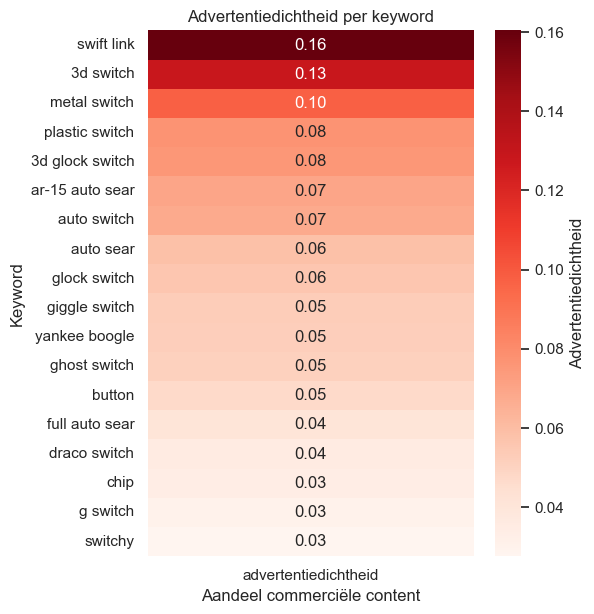

In [894]:
# Data voorbereiden voor heatmap (zonder 'lightning link')
heatmap_df = keyword_stats_filtered[["advertentiedichtheid"]]

sns.set_theme(style="white")
plt.figure(figsize=(6, max(6, len(heatmap_df) * 0.35)))

sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".2f",
    cmap="Reds",
    cbar_kws={"label": "Advertentiedichtheid"}
)

plt.title("Advertentiedichtheid per keyword")
plt.xlabel("Aandeel commerciële content")
plt.ylabel("Keyword")

plt.tight_layout()
plt.show()

De analyse van advertentiedichtheid per keyword laat zien dat commerciële content niet gelijkmatig over alle zoektermen is verdeeld. Opvallend is dat termen zoals *“swift link”* en *“3D switch”* een relatief hoger aandeel commerciële content bevatten dan meer expliciete termen zoals *“glock switch”* of *“auto sear”*. Dit wijst erop dat commerciële werving vaker plaatsvindt via minder directe of verhullende terminologie. De heatmap visualiseert dit patroon door per keyword het aandeel commerciële content inzichtelijk te maken, waarmee zichtbaar wordt dat bepaalde termen structureel vaker in een wervingscontext worden gebruikt. Deze bevinding suggereert dat advertenties binnen dit domein strategisch gebruikmaken van terminologische variatie om zichtbaarheid en benaderbaarheid te optimaliseren.

### Koppeling tussen zoekwoorden en doorverwijzingsplatformen

Om deelvraag 1 en deelvraag 2 met elkaar te verbinden, is onderzocht in hoeverre zoekwoorden met een hogere advertentiedichtheid ook vaker gepaard gaan met doorverwijzingen naar directe communicatieplatformen. Hierbij is per keyword gekeken naar het aandeel video’s dat zowel commerciële kenmerken vertoont als verwijst naar platforms zoals Telegram, WhatsApp en Discord. Deze analyse maakt het mogelijk om te beoordelen of bepaalde terminologie niet alleen commercieel wordt ingezet, maar ook functioneert als toegangspunt tot verdere directe communicatie.

In [895]:
platforms = [
    "telegram", "whatsapp", "discord",
    "snapchat", "signal", "session"
]

# Filter: alleen commerciële content
df_commercial = df[df["signal_commercieel"]]

# Per keyword: hoeveel platformverwijzingen
keyword_platform = (
    df_commercial
    .groupby("keyword")[
        [f"{p}_signal" for p in platforms]
    ]
    .sum()
)

# Normaliseren per keyword (aandeel)
keyword_platform_ratio = keyword_platform.div(
    keyword_platform.sum(axis=1), axis=0
).fillna(0)

keyword_platform_ratio.head()

,telegram_signal,whatsapp_signal,discord_signal,snapchat_signal,signal_signal,session_signal
keyword,,,,,,
3d glock switch,0.4,0.3,0.3,0.0,0.0,0.0
3d switch,0.5,0.0,0.5,0.0,0.0,0.0
ar-15 auto sear,0.5,0.0,0.5,0.0,0.0,0.0
auto sear,1.0,0.0,0.0,0.0,0.0,0.0
auto switch,0.5,0.0,0.5,0.0,0.0,0.0


In [896]:
keyword_platform_ratio_num = keyword_platform_ratio.apply(pd.to_numeric, errors="coerce").fillna(0)

In [897]:
keyword_platform_ratio_num = keyword_platform_ratio.copy()

# Forceer elke kolom naar numeric -> float
for col in keyword_platform_ratio_num.columns:
    keyword_platform_ratio_num[col] = pd.to_numeric(keyword_platform_ratio_num[col], errors="coerce")

keyword_platform_ratio_num = keyword_platform_ratio_num.astype(float).fillna(0.0)

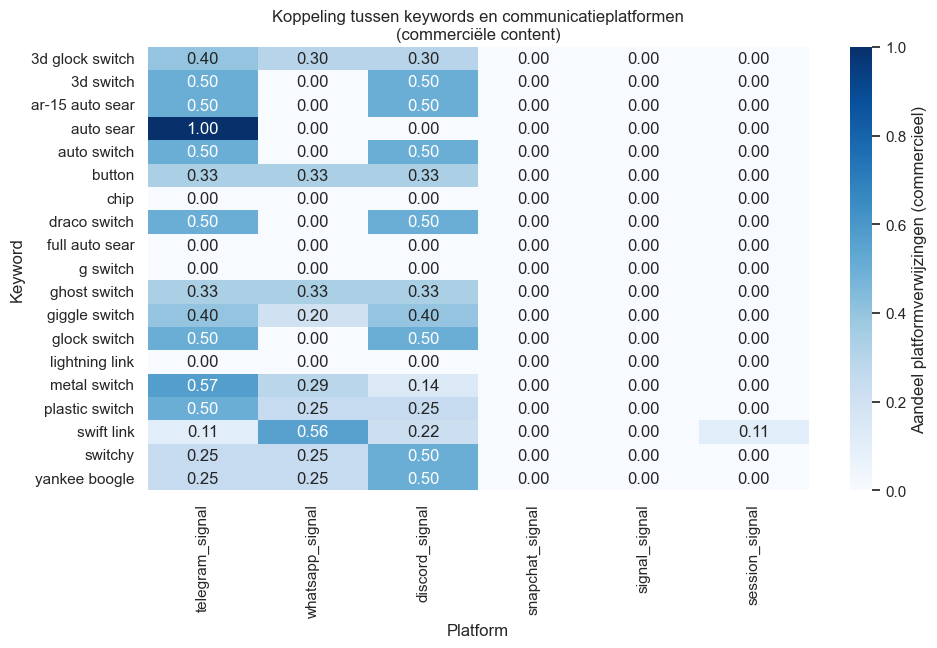

In [898]:
sns.set_theme(style="white")
plt.figure(figsize=(10, max(6, len(keyword_platform_ratio_num) * 0.35)))

sns.heatmap(
    keyword_platform_ratio_num,
    cmap="Blues",
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Aandeel platformverwijzingen (commercieel)"}
)

plt.title("Koppeling tussen keywords en communicatieplatformen\n(commerciële content)")
plt.xlabel("Platform")
plt.ylabel("Keyword")

plt.tight_layout()
plt.show()

### Koppeling tussen zoekwoorden en communicatieplatformen

De bovenstaande heatmap visualiseert de relatie tussen gebruikte zoekwoorden en de communicatieplatformen waarnaar in commerciële content wordt doorverwezen. De analyse is uitgevoerd op een subset van de dataset die uitsluitend commerciële signalen bevat. Per zoekwoord is berekend welk aandeel van de platformverwijzingen betrekking heeft op specifieke communicatieplatformen. Deze waarden zijn genormaliseerd per keyword, waardoor de weergegeven aandelen per rij optellen tot 1.

De rijen in de heatmap representeren de gebruikte zoekwoorden, terwijl de kolommen de verschillende communicatieplatformen weergeven. De kleurintensiteit geeft het relatieve aandeel platformverwijzingen weer binnen commerciële content: hoe donkerder de kleur, hoe groter het aandeel van dat platform voor het betreffende zoekwoord. Op deze manier wordt zichtbaar welke communicatiekanalen dominant zijn binnen specifieke terminologische contexten.

Uit de resultaten blijkt dat Telegram voor een groot aantal zoekwoorden het meest voorkomende doorverwijzingsplatform is binnen commerciële content. Dit geldt met name voor termen als *auto sear*, *auto switch*, *metal switch* en *plastic switch*. WhatsApp komt selectiever voor, maar vertoont een sterke koppeling met bepaalde verhullende termen zoals *swift link*, waar het platform zelfs dominant is ten opzichte van Telegram en Discord. Discord is vooral aanwezig bij bredere of minder expliciete zoekwoorden en lijkt vaker te functioneren als een tussenliggende community-omgeving dan als primair verkoopkanaal.

Opvallend is dat platformen zoals Snapchat, Signal en Session nauwelijks voorkomen in de commerciële subset. Dit suggereert dat deze kanalen slechts sporadisch worden ingezet of een marginale rol spelen binnen het wervingsproces. In samenhang met eerdere analyses laat deze heatmap zien dat zowel de gekozen terminologie als het gebruikte communicatieplatform onderdeel uitmaken van een selectieve en gefaseerde wervingsstrategie, waarbij bepaalde zoekwoorden structureel worden gekoppeld aan directere vormen van communicatie.

## Exploratieve tekstclusteranalyse

Om de beschrijvende analyse verder te verdiepen, wordt in dit onderdeel gebruikgemaakt van een exploratieve tekstclusteranalyse. Het doel van deze analyse is om te onderzoeken of teksten binnen de dataset op natuurlijke wijze gegroepeerd kunnen worden op basis van inhoudelijke gelijkenis, zonder vooraf vastgestelde labels of aannames.

Voor deze benadering is bewust gekozen voor tekstclustering in plaats van een voorspellend machine-learningmodel. Tekstclustering sluit aan bij het verkennende karakter van dit onderzoek, aangezien het niet gericht is op het voorspellen van toekomstig gedrag, maar op het identificeren van onderliggende patronen in de data. Hierdoor kan worden onderzocht of commerciële communicatie zich als een afzonderlijk cluster manifesteert binnen de bredere verzameling teksten.

Door middel van deze analyse kan worden verkend in hoeverre de eerder geïdentificeerde verschillen in commerciële taaldichtheid ook zichtbaar zijn op basis van puur tekstuele kenmerken. De clustering fungeert daarmee als een aanvullende, data-gedreven validatie van de beschrijvende bevindingen, waarbij de resultaten indicatief en interpretatief van aard zijn.

### Methode: tekstvectorisatie en clustering

Om teksten automatisch te kunnen clusteren, moeten zij eerst worden omgezet naar een numerieke representatie. In deze analyse wordt hiervoor gebruikgemaakt van **TF–IDF vectorisatie** (Term Frequency–Inverse Document Frequency). TF–IDF is geschikt voor exploratieve tekstanalyse omdat het woorden zwaarder meeweegt die relatief kenmerkend zijn voor een tekst, en veelvoorkomende woorden die in vrijwel alle teksten voorkomen juist afzwakt.

Na vectorisatie worden de tekstvectoren gegroepeerd met behulp van een clustering-algoritme. In dit project wordt gekozen voor **K-Means clustering**, omdat dit een transparante en reproduceerbare methode is die goed toepasbaar is op TF–IDF representaties. K-Means groepeert teksten zodanig dat teksten binnen een cluster onderling zo vergelijkbaar mogelijk zijn, terwijl clusters onderling juist zoveel mogelijk van elkaar verschillen.

Het aantal clusters (*k*) wordt in eerste instantie bepaald op basis van een praktische afweging en wordt waar mogelijk ondersteund met een eenvoudige evaluatiemethode (bijvoorbeeld de elbow-methode of silhouette score). De resulterende clusters worden vervolgens geïnterpreteerd door per cluster de meest kenmerkende termen (hoogste TF–IDF gewichten) en voorbeeldteksten te inspecteren. Op deze manier kan worden onderzocht of commerciële communicatie zich als een afzonderlijk cluster aftekent binnen de dataset.

De uitkomsten van deze clustering zijn **exploratief**: zij zijn bedoeld om patronen te verkennen en te ondersteunen, en vormen geen bewijs voor causale relaties of toekomstige voorspellingen.

In [842]:
import re
import numpy as np
import pandas as pd

try:
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
except ImportError as e:
    raise ImportError("scikit-learn ontbreekt. Installeer met: pip install scikit-learn") from e


# === 1) Kies tekstkolommen ===
# Zet hier jouw echte kolomnamen, OF laat leeg en laat het script auto-detecten.
TEXT_COLS = [
    # "bio",
    # "video_desc",
    # "caption",
    # "description",
]

# Auto-detect als lijst leeg is
if not TEXT_COLS:
    # Kies alle kolommen die 'tekstachtig' zijn (object/string) en niet extreem lang "metadata" lijken.
    candidate_cols = [c for c in df.columns if df[c].dtype == "object"]
    # Vaak wil je niet alles; filter eventueel bekende niet-tekst kolommen eruit:
    drop_like = {"url", "link", "id", "username", "user", "date", "timestamp"}
    candidate_cols = [c for c in candidate_cols if not any(x in c.lower() for x in drop_like)]

    if not candidate_cols:
        raise ValueError(
            "Geen tekstkolommen gevonden. Vul TEXT_COLS met jouw tekstkolommen (bio/caption/video_desc/etc.)."
        )

    TEXT_COLS = candidate_cols
    print("Auto-detected TEXT_COLS:", TEXT_COLS)

# Check of kolommen bestaan
missing = [c for c in TEXT_COLS if c not in df.columns]
if missing:
    raise ValueError(f"Deze tekstkolommen ontbreken in df: {missing}")

# Combineer tekstvelden
df = df.copy()
df["ml_text"] = (
    df[TEXT_COLS]
    .fillna("")
    .astype(str)
    .agg(" ".join, axis=1)
    .str.strip()
)

# Filter lege teksten
df_ml = df[df["ml_text"].str.len() > 0].copy()
print("Aantal records met tekst voor clustering:", len(df_ml))

# Snelle sanity check
print("\nVoorbeelden ruwe tekst:")
for t in df_ml["ml_text"].head(3).tolist():
    print("-", t[:200])


# === 2) Cleaning (belangrijk bij scraped data met veel links) ===
def clean_text(s: str) -> str:
    s = s.lower()
    s = re.sub(r"http\S+|www\.\S+", " ", s)   # urls weg
    s = re.sub(r"@\w+", " ", s)              # mentions weg
    s = re.sub(r"#\w+", " ", s)              # hashtags weg (optioneel, maar vaak ruis)
    s = re.sub(r"[^a-z0-9\s]", " ", s)       # leestekens/emoji weg
    s = re.sub(r"\s+", " ", s).strip()
    return s

df_ml["ml_text_clean"] = df_ml["ml_text"].astype(str).map(clean_text)
df_ml = df_ml[df_ml["ml_text_clean"].str.len() > 0].copy()

print("\nLege teksten na cleaning:", (df_ml["ml_text_clean"].str.len() == 0).sum())
print("Voorbeelden cleaned tekst:")
for t in df_ml["ml_text_clean"].head(3).tolist():
    print("-", t[:200])


# === 3) TF-IDF vectorisatie ===
# Belangrijk: geen english stopwords bij NL/links data.
# min_df=1 is veilig om 'empty vocabulary' te voorkomen.
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words=None,
    min_df=1,
    max_df=0.95,
    token_pattern=r"(?u)\b[a-zA-Z0-9]{2,}\b",
    ngram_range=(1, 2)
)

X = vectorizer.fit_transform(df_ml["ml_text_clean"])
print("\nTF-IDF matrix shape:", X.shape)
print("Aantal features:", len(vectorizer.get_feature_names_out()))


# === 4) KMeans clustering ===
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
df_ml["cluster"] = kmeans.fit_predict(X)

print("\nCluster verdeling:")
print(df_ml["cluster"].value_counts().sort_index())


# === 5) Silhouette score (optioneel) ===
if X.shape[0] >= 50 and k > 1:
    sample_n = min(2000, X.shape[0])
    rng = np.random.RandomState(42)
    sample_idx = rng.choice(X.shape[0], sample_n, replace=False)
    sil = silhouette_score(X[sample_idx], df_ml["cluster"].iloc[sample_idx])
    print(f"\nSilhouette score (sample n={sample_n}): {sil:.3f}")
else:
    print("\nTe weinig samples voor silhouette score of k=1.")


# === 6) Interpretatie: top-termen per cluster ===
feature_names = np.array(vectorizer.get_feature_names_out())
centers = kmeans.cluster_centers_

def top_terms_for_cluster(cluster_id: int, top_n: int = 12):
    idx = np.argsort(centers[cluster_id])[::-1][:top_n]
    return feature_names[idx]

print("\nTop-termen per cluster:")
for c in range(k):
    print(f"\nCluster {c}:")
    print(", ".join(top_terms_for_cluster(c, top_n=12)))


# === 7) Voorbeeldteksten per cluster ===
for c in range(k):
    print(f"\n--- Voorbeelden uit cluster {c} ---")
    examples = df_ml[df_ml["cluster"] == c]["ml_text"].head(3).tolist()
    for txt in examples:
        print("-", (txt[:250] + "…") if len(txt) > 250 else txt)

Auto-detected TEXT_COLS: ['hashtags_list']
Aantal records met tekst voor clustering: 4577

Voorbeelden ruwe tekst:
- ['sabinablair', 'theburntchip', 'vlog', 'newyork', 'fyppppp']
- ['kawaii', 'real', 'splatchip']
- ['evosessions', 'formulae']

Lege teksten na cleaning: 0
Voorbeelden cleaned tekst:
- sabinablair theburntchip vlog newyork fyppppp
- kawaii real splatchip
- evosessions formulae

TF-IDF matrix shape: (4018, 25775)
Aantal features: 25775

Cluster verdeling:
cluster
0      63
1    3150
2     242
3     238
4     325
Name: count, dtype: int64

Silhouette score (sample n=2000): 0.006

Top-termen per cluster:

Cluster 0:
switches, cnc, switch auto, switch, auto, buttons, metal cnc, g19 gen5, auto g19, gen5 metal, g19, gen5

Cluster 1:
fyp, switch, gaming, viral, funny, airsoft, 3dprinting, didyouknow, chips, callofduty, foryoupage, switches

Cluster 2:
foryou, fyp foryou, fyp, foryou fyp, foryoupage, viral, foryou foryoupage, foryou viral, funny, gaming, trending, foryou yn

Clus

## Analyse en interpretatie van de tekstclusters

De uitgevoerde tekstclusteranalyse is gebaseerd op hashtags en korte tekstuele labels, wat resulteert in clusters die primair worden gevormd op basis van thematische en functionele overeenkomst. De clustering laat zien dat teksten zich groeperen rondom herkenbare contentcategorieën, zoals gaming, entertainment en productgerelateerde termen.

### Algemene observaties
De clusterverdeling is ongelijk, waarbij één cluster (cluster 1) het merendeel van de data bevat. Dit wijst erop dat een groot deel van de teksten bestaat uit generieke of breed gebruikte hashtags (zoals *fyp*, *viral* en *gaming*), die minder onderscheidend zijn en daardoor als een soort “restcluster” fungeren. Kleinere clusters bevatten daarentegen meer specifieke en thematisch coherente termen.

De lage silhouette score (≈ 0.006) is te verklaren door de aard van de inputdata. Hashtags zijn kort, sterk overlappend en vaak trendgedreven, waardoor de scheiding tussen clusters minder scherp is. Dit betekent niet dat de clustering onbruikbaar is, maar dat de resultaten vooral **exploratief** en **interpretatief** van aard zijn.

### Cluster-specifieke interpretatie

**Cluster 0 – Product- en objectgerichte termen**  
Dit cluster wordt gekenmerkt door termen zoals *switches*, *cnc*, *metal*, *g19* en *gen5*. De voorbeelden suggereren een focus op fysieke objecten, technische componenten en mogelijk productgerelateerde content. Dit cluster wijkt duidelijk af van de meer generieke entertainmentclusters en kan worden geïnterpreteerd als een niche waarin expliciete object- of productverwijzingen centraal staan.

**Cluster 1 – Generieke en virale content**  
Cluster 1 bevat een groot aandeel algemene hashtags zoals *fyp*, *viral*, *funny* en *gaming*. De voorbeeldteksten laten weinig thematische specificiteit zien. Dit cluster fungeert als een brede verzamelcategorie voor content die primair gericht is op zichtbaarheid en bereik, in plaats van inhoudelijke specialisatie.

**Cluster 2 – Voedsel- en consumptiegerelateerde content**  
In dit cluster komen termen voor als *chips*, *foodie*, *flavor* en *reaction*. De combinatie van productnamen en reactie-georiënteerde hashtags wijst op content die draait om consumptie en beleving. Dit cluster is thematisch coherenter dan de generieke clusters en vormt een herkenbare inhoudelijke categorie.

**Cluster 3 – Gaming en specifieke merken/franchises**  
Cluster 3 wordt gedomineerd door termen als *nintendo*, *nintendoswitch*, *switch2* en *zelda*. Dit cluster laat zien dat merk- en franchise-specifieke content zich duidelijk kan aftekenen wanneer voldoende consistente terminologie wordt gebruikt. Dit ondersteunt de geschiktheid van tekstclustering voor het identificeren van nichegemeenschappen binnen de dataset.

**Cluster 4 – Meme- en entertainmentcontent**  
Dit cluster bevat termen zoals *meme*, *funny*, *relatable* en *viral*. De inhoud is sterk gericht op humor en herkenbaarheid en overlapt deels met cluster 1, maar onderscheidt zich door expliciete meme-gerelateerde termen.

### Relatie tot eerdere analyse
De clustering bevestigt dat content zich niet willekeurig verspreidt, maar zich groepeert rond functionele en thematische categorieën. Dit ondersteunt eerdere bevindingen waarin verschillen werden waargenomen tussen typen content en hun mogelijke rol binnen online platformen. Hoewel de clusters geen harde scheiding vertonen, bieden zij waardevolle context voor het interpreteren van commerciële en niet-commerciële patronen binnen de dataset.

Samenvattend laat de tekstclusteranalyse zien dat zelfs op basis van korte en informele tekstfragmenten betekenisvolle structuur kan worden blootgelegd, mits de resultaten als verkennend worden geïnterpreteerd.

In [843]:
from sklearn.cluster import KMeans

# === Elbow-analyse ===
inertias = []
K = range(2, 11)

for k in K:
    model = KMeans(
        n_clusters=k,
        random_state=42,
        n_init="auto"
    )
    model.fit(X)
    inertias.append(model.inertia_)

# Print de waarden (handig voor je verslag)
print("k  |  inertia")
for k, inertia in zip(K, inertias):
    print(f"{k:<2} | {inertia:.2f}")

k  |  inertia
2  | 3987.41
3  | 3967.30
4  | 3947.79
5  | 3937.69
6  | 3934.42
7  | 3928.47
8  | 3934.58
9  | 3930.39
10 | 3926.89


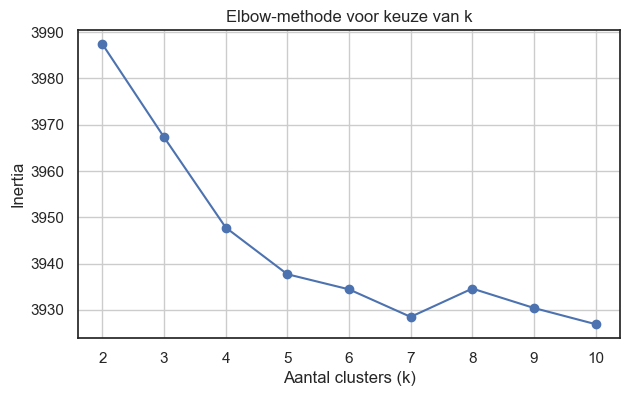

In [844]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.plot(K, inertias, marker="o")
plt.xlabel("Aantal clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow-methode voor keuze van k")
plt.grid(True)
plt.show()

## Analyse van de elbow-grafiek

Figuur X toont de resultaten van de elbow-methode voor verschillende waarden van het aantal clusters (*k*). De grafiek laat een duidelijke afname van de inertia zien bij het verhogen van *k* van 2 naar 4. In dit interval wordt de grootste winst geboekt in termen van compactere clusters, wat erop wijst dat het opdelen van de data in meerdere groepen hier betekenisvolle structuur toevoegt.

Vanaf *k ≈ 5* vlakt de curve zichtbaar af. Verdere verhoging van het aantal clusters resulteert slechts in marginale verbeteringen van de inertia, en in sommige gevallen zelfs in lichte schommelingen. Dit wijst erop dat extra clusters na dit punt voornamelijk zorgen voor fijnere opsplitsing van bestaande groepen, zonder substantieel nieuwe structuur bloot te leggen.

Het ontbreken van een scherp knikpunt is te verklaren door de aard van de inputdata, die voornamelijk bestaat uit korte en sterk overlappende hashtags. Dergelijke teksten delen vaak algemene termen (zoals *fyp* en *viral*), waardoor een harde scheiding tussen clusters minder waarschijnlijk is. In dit type data is een geleidelijk aflopende elbow-curve gebruikelijk.

Op basis van deze observaties is gekozen voor *k = 5* als pragmatische en inhoudelijk verdedigbare waarde. Deze keuze biedt een balans tussen het zichtbaar maken van thematische verschillen en het behouden van interpretatiegemak, en sluit aan bij de inhoudelijke coherentie van de eerder geïdentificeerde clusters.

## Discussie
In deze discussie worden de resultaten van de data-analyse kritisch beschouwd in relatie tot de twee deelvragen van het onderzoek. Eerst worden de sterke punten van het onderzoek besproken, gevolgd door de belangrijkste beperkingen. Vervolgens worden de resultaten geïnterpreteerd per deelvraag en afgesloten met aanbevelingen voor vervolgonderzoek.

### Sterke punten van het onderzoek
Een belangrijk sterk punt van dit onderzoek is het gebruik van een eigen gebouwde scraper om systematisch en reproduceerbaar data te verzamelen van het TikTok-platform. Door te werken met vooraf gedefinieerde en thematisch onderbouwde zoekwoorden is een dataset opgebouwd die specifiek gericht is op online communicatie rondom vuurwapenconversies en -modificaties. Dit vergroot de inhoudelijke relevantie van de verzamelde data.

Daarnaast is de analyse gebaseerd op meerdere tekstuele bronnen binnen TikTok, waaronder profielbeschrijvingen, videobeschrijvingen, hashtags en biografie-links. Deze combinatie maakt het mogelijk om zowel expliciete doorverwijzingen (zoals externe links) als impliciete vormen van werving (zoals taalgebruik en framing) te analyseren. De uitgebreide data-cleaning en normalisatie zorgen ervoor dat de analyses consistent en minder foutgevoelig zijn.

Een ander sterk punt is dat het onderzoek zich richt op observeerbare gedragingen en communicatievormen, in plaats van aannames over intentie. Door commerciële werving te benaderen via tekstuele en structurele kenmerken blijft de analyse transparant en controleerbaar.

### Beperkingen van het onderzoek

Ondanks deze sterke punten kent het onderzoek ook enkele beperkingen. Ten eerste is de dataset geografisch begrensd, doordat de scraping is uitgevoerd zonder VPN vanuit Nederland. Hierdoor zijn met name Nederlandse en Belgische domeinen oververtegenwoordigd, wat invloed kan hebben op de zichtbaarheid van bepaalde platformen. Resultaten zijn daardoor niet zonder meer generaliseerbaar naar andere landen of contexten.

Daarnaast is de analyse afhankelijk van expliciet waarneembare signalen, zoals links in biografieën of commerciële termen in tekstvelden. Wervingsactiviteiten die plaatsvinden via privéberichten, gesloten groepen of impliciete sociale relaties blijven buiten beeld. Dit betekent dat de resultaten een indicatief, maar niet volledig beeld geven van het totale wervingsproces.

Verder kan keyword-gebaseerde scraping leiden tot ruis in de dataset. Sommige termen hebben meerdere betekenissen, waardoor niet alle gevonden content direct relevant is voor het onderzoeksdomein. Hoewel dit deels wordt ondervangen door inhoudelijke filtering en interpretatie, blijft dit een structurele beperking.


### Interpretatie van de resultaten per deelvraag

**Deelvraag 1: Naar welke platformen worden potentiële klanten doorverwezen?**

De analyse laat zien dat potentiële klanten voornamelijk worden doorverwezen naar link aggregrators. Echter word er ook verwezen naar **direct messaging-platformen**, met name WhatsApp, Telegram en Discord. Uit de frequentiegrafieken blijkt dat Discord het vaakst voorkomt in absolute aantallen, terwijl WhatsApp en Telegram minder frequent worden genoemd maar relatief vaker gepaard gaan met commerciële taal.

Deze bevinding suggereert een functioneel onderscheid tussen de platformen. Discord lijkt mogelijk te worden ingezet als community- of verzamelplatform, waar toegang laagdrempelig is en interactie grotendeels groepsgericht plaatsvindt. De lagere commerciële taaldichtheid ondersteunt deze interpretatie.

WhatsApp en Telegram vertonen daarentegen een hogere commerciële taaldichtheid in verhouding tot hun frequentie. Dit wijst erop dat deze platformen vaker worden gebruikt in een context waarin directe, één-op-één communicatie en mogelijke verkoop van vuurwapen modificaties en conversies centraal staat. De grafieken suggereren daarmee een funnelstructuur, waarbij TikTok fungeert als zichtbaarheidsplatform en direct messaging wordt ingezet voor verdere afhandeling en mogelijk transacties.

Het beperkte aantal expliciete externe links versterkt deze interpretatie: doorverwijzing verloopt niet primair via openbare webpagina’s, maar via afgeschermde communicatiekanalen. Dit duidt op een bewuste keuze voor platformen die privacy, controle en directe interactie faciliteren.

**Deelvraag 2: Wat voor soort advertenties worden gebruikt om potentiële klanten te werven?**

De analyse toont aan dat werving zelden plaatsvindt via expliciete advertenties in traditionele zin. In plaats daarvan wordt gebruikgemaakt van informele en indirecte advertentievormen. Veel content maakt gebruik van lifestyle- en communitygerichte framing, waarbij producten of diensten impliciet worden genormaliseerd binnen bredere contentcategorieën zoals humor, gaming of dagelijkse interactie.

Commerciële taal is vaak subtiel en contextueel ingebed, bijvoorbeeld door het benoemen van beschikbaarheid, exclusiviteit of contactmogelijkheden zonder directe call-to-action. Dit suggereert dat de advertentiestrategie gericht is op het verlagen van drempels en het stimuleren van nieuwsgierigheid, in plaats van directe verkoop.

De combinatie van impliciete advertenties en doorverwijzing naar direct messaging-platformen wijst op een wervingsstrategie die sterk leunt op persoonlijke interactie en vertrouwen, in plaats van op openbare en zichtbare commerciële communicatie.

### Aanbevelingen voor vervolgonderzoek

Voor toekomstig onderzoek zou het waardevol zijn om meerdere geografische contexten te vergelijken door data te verzamelen vanuit verschillende landen of regio’s. Dit kan helpen om vast te stellen in hoeverre de waargenomen patronen context-specifiek zijn.

Daarnaast kan vervolgonderzoek profiteren van rijkere datavormen, zoals commentsecties, interactienetwerken of tijdsanalyses, om beter inzicht te krijgen in de dynamiek van werving en doorverwijzing. Ook een combinatie van kwantitatieve analyse met kwalitatieve casestudies kan bijdragen aan een diepgaander begrip van het wervingsproces.

Tot slot zou toekomstig onderzoek kunnen kijken naar de rol van platformbeleid en moderatie, en hoe deze van invloed zijn op de gekozen wervingsstrategieën. Dit kan helpen om beter te begrijpen waarom bepaalde indirecte advertentievormen worden verkozen boven expliciete commerciële communicatie.